In [1]:
import numpy as np
import pandas as pd
import os
import requests
import tarfile
import urllib.request
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv('regression/data.csv')
df.head()

,formula,S_p,Eg,Mn_BL,std_BL,mpe,D,vpa,PF,N,Mn_N,At_W,Melt_T,Mn_C,Mn_R,Mn_CR,Mn_Ele,Mn_NsV,Mn_NpV,Mn_NdV,Mn_NfV,Mn_NV,Mn_NsU,Mn_NpU,Mn_NdU,Mn_NfU,Mn_NUn,Mn_GSv,Mn_GSEg,Mn_GSm,Mn_SGN,AM_a,X_a,r_a,Ir_a,MP_a,TC_a,vdw_r_a,EA_a,MEN_AN_a,MEN_r_a,MEN_V_a,MEN_AW_a,CR_pyykko_a,D_a,Dp_a,AM_b,X_b,r_b,Ir_b,MP_b,TC_b,vdw_r_b,EA_b,MEN_AN_b,MEN_r_b,MEN_V_b,MEN_AW_b,CR_pyykko_b,D_b,Dp_b
0,Pu5Ru3,2.819687,0.000000,2.969205,0.122666,0.562184,15.235961,20.751478,0.842439,75.25,36.00,190.401250,1548.2500,4.875,6.25,171.625,1.6250,1.625,0.00,2.625,3.75,8.00,0.375,0.00,1.125,5.0,6.50,16.366250,0.00000,0.198752,79.625,244.000,1.28,1.75,0.9675,912.50,6.0,2.43,-0.500000,94,175,NaN,244.000,172,19.700,132.0000,101.07000,2.20,1.30,0.661,2607.00,120.00000,2.13,1.046382,44,130,8.3,101.070,125,12.100000,72.00000
1,ReO3,0.336845,0.000000,1.913169,0.000001,0.311128,8.250241,11.784713,0.276212,24.75,78.75,58.551300,905.8500,13.750,3.00,87.250,3.0550,2.000,3.00,1.250,3.50,9.75,0.000,1.50,1.250,0.0,2.75,10.492500,0.00000,0.000000,57.500,186.207,1.90,1.35,0.7125,3459.00,48.0,2.16,0.060397,75,135,8.85,186.207,131,20.800,62.0000,15.99940,3.44,0.60,1.260,54.80,0.02658,1.52,1.461105,8,60,14.0,15.999,63,0.001308,5.30000
2,Yb3Mg,14.406792,0.000000,3.690337,0.000000,0.740480,6.348126,35.537197,0.573238,55.50,46.25,135.866750,1049.7500,2.750,5.25,175.500,1.2725,2.000,0.00,0.000,10.50,12.50,0.000,0.00,0.000,0.0,0.00,31.312500,0.00000,0.000000,217.250,173.040,1.10,1.75,1.0840,1097.00,39.0,2.26,-0.020000,70,175,24.80,173.045,170,6.900,139.0000,24.30500,1.31,1.50,0.860,923.00,160.00000,1.73,-0.420000,12,150,14.0,24.305,139,1.740000,71.20000
3,B9H11,638.974583,2.911795,1.236931,0.059786,0.101052,0.948949,9.483111,0.125865,2.80,83.00,5.419317,1064.3055,6.400,1.45,54.850,2.1280,1.450,0.45,0.000,0.00,1.90,0.550,2.25,0.000,0.0,2.80,6.865875,5.00495,0.000000,181.400,10.811,2.04,0.85,0.4100,2349.00,27.0,1.92,0.279723,5,85,4.60,10.810,85,2.340,20.5000,1.00794,2.20,0.25,0.000,14.01,0.18050,1.10,0.754598,1,25,14.1,1.008,32,0.000082,4.50711
4,Li3Ga7,9.061345,0.000000,2.838474,0.073217,0.542895,4.566325,18.505509,0.555130,22.60,52.10,50.888400,348.1440,9.400,3.40,123.800,1.5610,1.700,0.70,7.000,0.00,9.40,0.300,3.50,0.000,0.0,3.80,18.178250,0.00000,0.000000,113.500,6.941,0.98,1.45,0.9000,453.69,85.0,1.82,0.618049,3,145,13.10,6.940,133,0.534,164.1125,69.72300,1.81,1.30,0.760,302.91,29.00000,1.87,0.301201,31,130,11.8,69.723,124,5.910000,50.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   formula      6864 non-null   object 
 1   S_p          6864 non-null   float64
 2   Eg           6864 non-null   float64
 3   Mn_BL        6864 non-null   float64
 4   std_BL       6864 non-null   float64
 5   mpe          6864 non-null   float64
 6   D            6864 non-null   float64
 7   vpa          6864 non-null   float64
 8   PF           6864 non-null   float64
 9   N            6864 non-null   float64
 10  Mn_N         6864 non-null   float64
 11  At_W         6864 non-null   float64
 12  Melt_T       6864 non-null   float64
 13  Mn_C         6864 non-null   float64
 14  Mn_R         6864 non-null   float64
 15  Mn_CR        6864 non-null   float64
 16  Mn_Ele       6864 non-null   float64
 17  Mn_NsV       6864 non-null   float64
 18  Mn_NpV       6864 non-null   float64
 19  Mn_NdV

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   formula      6864 non-null   object 
 1   S_p          6864 non-null   float64
 2   Eg           6864 non-null   float64
 3   Mn_BL        6864 non-null   float64
 4   std_BL       6864 non-null   float64
 5   mpe          6864 non-null   float64
 6   D            6864 non-null   float64
 7   vpa          6864 non-null   float64
 8   PF           6864 non-null   float64
 9   N            6864 non-null   float64
 10  Mn_N         6864 non-null   float64
 11  At_W         6864 non-null   float64
 12  Melt_T       6864 non-null   float64
 13  Mn_C         6864 non-null   float64
 14  Mn_R         6864 non-null   float64
 15  Mn_CR        6864 non-null   float64
 16  Mn_Ele       6864 non-null   float64
 17  Mn_NsV       6864 non-null   float64
 18  Mn_NpV       6864 non-null   float64
 19  Mn_NdV

In [5]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 1 to 6863
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   formula      6785 non-null   object 
 1   S_p          6785 non-null   float64
 2   Eg           6785 non-null   float64
 3   Mn_BL        6785 non-null   float64
 4   std_BL       6785 non-null   float64
 5   mpe          6785 non-null   float64
 6   D            6785 non-null   float64
 7   vpa          6785 non-null   float64
 8   PF           6785 non-null   float64
 9   N            6785 non-null   float64
 10  Mn_N         6785 non-null   float64
 11  At_W         6785 non-null   float64
 12  Melt_T       6785 non-null   float64
 13  Mn_C         6785 non-null   float64
 14  Mn_R         6785 non-null   float64
 15  Mn_CR        6785 non-null   float64
 16  Mn_Ele       6785 non-null   float64
 17  Mn_NsV       6785 non-null   float64
 18  Mn_NpV       6785 non-null   float64
 19  Mn_NdV

In [6]:
data = df.iloc[:,1:]
data.head()

,S_p,Eg,Mn_BL,std_BL,mpe,D,vpa,PF,N,Mn_N,At_W,Melt_T,Mn_C,Mn_R,Mn_CR,Mn_Ele,Mn_NsV,Mn_NpV,Mn_NdV,Mn_NfV,Mn_NV,Mn_NsU,Mn_NpU,Mn_NdU,Mn_NfU,Mn_NUn,Mn_GSv,Mn_GSEg,Mn_GSm,Mn_SGN,AM_a,X_a,r_a,Ir_a,MP_a,TC_a,vdw_r_a,EA_a,MEN_AN_a,MEN_r_a,MEN_V_a,MEN_AW_a,CR_pyykko_a,D_a,Dp_a,AM_b,X_b,r_b,Ir_b,MP_b,TC_b,vdw_r_b,EA_b,MEN_AN_b,MEN_r_b,MEN_V_b,MEN_AW_b,CR_pyykko_b,D_b,Dp_b
1,0.336845,0.000000,1.913169,0.000001,0.311128,8.250241,11.784713,0.276212,24.75,78.75,58.551300,905.8500,13.75,3.00,87.25,3.0550,2.00,3.00,1.25,3.5,9.75,0.00,1.50,1.25,0.0,2.75,10.492500,0.00000,0.000000,57.50,186.207000,1.90,1.35,0.7125,3459.00,48.0,2.16,0.060397,75,135,8.85,186.207000,131,20.800,62.0000,15.99940,3.44,0.60,1.26,54.80,0.02658,1.52,1.461105,8,60,14.0,15.999,63,0.001308,5.30000
2,14.406792,0.000000,3.690337,0.000000,0.740480,6.348126,35.537197,0.573238,55.50,46.25,135.866750,1049.7500,2.75,5.25,175.50,1.2725,2.00,0.00,0.00,10.5,12.50,0.00,0.00,0.00,0.0,0.00,31.312500,0.00000,0.000000,217.25,173.040000,1.10,1.75,1.0840,1097.00,39.0,2.26,-0.020000,70,175,24.80,173.045000,170,6.900,139.0000,24.30500,1.31,1.50,0.86,923.00,160.00000,1.73,-0.420000,12,150,14.0,24.305,139,1.740000,71.20000
3,638.974583,2.911795,1.236931,0.059786,0.101052,0.948949,9.483111,0.125865,2.80,83.00,5.419317,1064.3055,6.40,1.45,54.85,2.1280,1.45,0.45,0.00,0.0,1.90,0.55,2.25,0.00,0.0,2.80,6.865875,5.00495,0.000000,181.40,10.811000,2.04,0.85,0.4100,2349.00,27.0,1.92,0.279723,5,85,4.60,10.810000,85,2.340,20.5000,1.00794,2.20,0.25,0.00,14.01,0.18050,1.10,0.754598,1,25,14.1,1.008,32,0.000082,4.50711
4,9.061345,0.000000,2.838474,0.073217,0.542895,4.566325,18.505509,0.555130,22.60,52.10,50.888400,348.1440,9.40,3.40,123.80,1.5610,1.70,0.70,7.00,0.0,9.40,0.30,3.50,0.00,0.0,3.80,18.178250,0.00000,0.000000,113.50,6.941000,0.98,1.45,0.9000,453.69,85.0,1.82,0.618049,3,145,13.10,6.940000,133,0.534,164.1125,69.72300,1.81,1.30,0.76,302.91,29.00000,1.87,0.301201,31,130,11.8,69.723,124,5.910000,50.00000
5,22.887388,0.000000,3.206197,0.004315,0.713049,4.405049,23.303713,0.719525,27.75,25.75,61.819684,1509.0550,5.25,4.25,163.50,1.4425,2.00,0.00,3.25,0.0,5.25,0.00,0.00,6.75,0.0,6.75,21.550000,0.00000,0.000005,194.00,44.955912,1.36,1.60,0.8850,1814.00,16.0,2.15,0.188200,21,160,15.00,44.955908,148,2.990,97.0000,112.41100,1.69,1.55,1.09,594.22,97.00000,2.18,-0.720000,48,155,13.1,112.414,136,8.690000,46.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 1 to 6863
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S_p          6785 non-null   float64
 1   Eg           6785 non-null   float64
 2   Mn_BL        6785 non-null   float64
 3   std_BL       6785 non-null   float64
 4   mpe          6785 non-null   float64
 5   D            6785 non-null   float64
 6   vpa          6785 non-null   float64
 7   PF           6785 non-null   float64
 8   N            6785 non-null   float64
 9   Mn_N         6785 non-null   float64
 10  At_W         6785 non-null   float64
 11  Melt_T       6785 non-null   float64
 12  Mn_C         6785 non-null   float64
 13  Mn_R         6785 non-null   float64
 14  Mn_CR        6785 non-null   float64
 15  Mn_Ele       6785 non-null   float64
 16  Mn_NsV       6785 non-null   float64
 17  Mn_NpV       6785 non-null   float64
 18  Mn_NdV       6785 non-null   float64
 19  Mn_NfV

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
RNG_SEED = 42
np.random.seed(RNG_SEED)

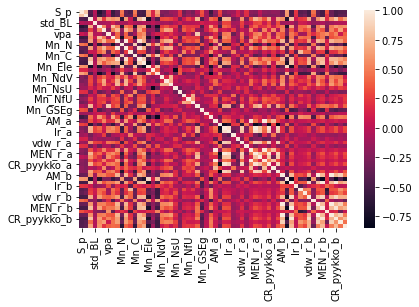

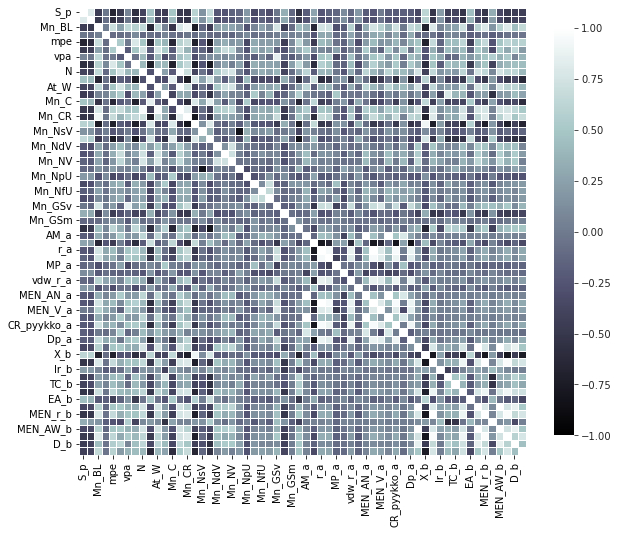

In [10]:
corr = data.corr()
sns.heatmap(corr)
fig = plt.subplots(figsize=(10,10))
# sns.set(font_scale=5)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=1, vmin=-1, fmt=".2f", linewidths=.5, square=True, center=0, \
                      annot=False, cmap='bone', annot_kws={"size": 50, "weight": 'bold'} ,cbar_kws={'shrink':0.75})
sns.color_palette('bright')                                            # choose from colorblind, bright or muted
plt.show()
#plt.savefig('images/corr1.png', dpi=1000)

In [11]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False


selected_columns = data.columns[columns]
data = data[selected_columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 1 to 6863
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S_p      6785 non-null   float64
 1   Eg       6785 non-null   float64
 2   Mn_BL    6785 non-null   float64
 3   std_BL   6785 non-null   float64
 4   mpe      6785 non-null   float64
 5   D        6785 non-null   float64
 6   vpa      6785 non-null   float64
 7   PF       6785 non-null   float64
 8   N        6785 non-null   float64
 9   Mn_N     6785 non-null   float64
 10  Melt_T   6785 non-null   float64
 11  Mn_C     6785 non-null   float64
 12  Mn_CR    6785 non-null   float64
 13  Mn_Ele   6785 non-null   float64
 14  Mn_NsV   6785 non-null   float64
 15  Mn_NpV   6785 non-null   float64
 16  Mn_NdV   6785 non-null   float64
 17  Mn_NfV   6785 non-null   float64
 18  Mn_NV    6785 non-null   float64
 19  Mn_NsU   6785 non-null   float64
 20  Mn_NpU   6785 non-null   float64
 21  Mn_NdU   6785 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 1 to 6863
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S_p      6785 non-null   float64
 1   Eg       6785 non-null   float64
 2   Mn_BL    6785 non-null   float64
 3   std_BL   6785 non-null   float64
 4   mpe      6785 non-null   float64
 5   D        6785 non-null   float64
 6   vpa      6785 non-null   float64
 7   PF       6785 non-null   float64
 8   N        6785 non-null   float64
 9   Mn_N     6785 non-null   float64
 10  Melt_T   6785 non-null   float64
 11  Mn_C     6785 non-null   float64
 12  Mn_CR    6785 non-null   float64
 13  Mn_Ele   6785 non-null   float64
 14  Mn_NsV   6785 non-null   float64
 15  Mn_NpV   6785 non-null   float64
 16  Mn_NdV   6785 non-null   float64
 17  Mn_NfV   6785 non-null   float64
 18  Mn_NV    6785 non-null   float64
 19  Mn_NsU   6785 non-null   float64
 20  Mn_NpU   6785 non-null   float64
 21  Mn_NdU   6785 

In [14]:
data = pd.concat([df['formula'], data], axis = 1)
data.head()

,formula,S_p,Eg,Mn_BL,std_BL,mpe,D,vpa,PF,N,Mn_N,Melt_T,Mn_C,Mn_CR,Mn_Ele,Mn_NsV,Mn_NpV,Mn_NdV,Mn_NfV,Mn_NV,Mn_NsU,Mn_NpU,Mn_NdU,Mn_NfU,Mn_NUn,Mn_GSv,Mn_GSEg,Mn_GSm,Mn_SGN,AM_a,X_a,r_a,Ir_a,MP_a,TC_a,vdw_r_a,EA_a,MEN_V_a,D_a,Dp_a,AM_b,X_b,r_b,Ir_b,MP_b,TC_b,vdw_r_b,EA_b,MEN_V_b,D_b,Dp_b
1,ReO3,0.336845,0.000000,1.913169,0.000001,0.311128,8.250241,11.784713,0.276212,24.75,78.75,905.8500,13.75,87.25,3.0550,2.00,3.00,1.25,3.5,9.75,0.00,1.50,1.25,0.0,2.75,10.492500,0.00000,0.000000,57.50,186.207000,1.90,1.35,0.7125,3459.00,48.0,2.16,0.060397,8.85,20.800,62.0000,15.99940,3.44,0.60,1.26,54.80,0.02658,1.52,1.461105,14.0,0.001308,5.30000
2,Yb3Mg,14.406792,0.000000,3.690337,0.000000,0.740480,6.348126,35.537197,0.573238,55.50,46.25,1049.7500,2.75,175.50,1.2725,2.00,0.00,0.00,10.5,12.50,0.00,0.00,0.00,0.0,0.00,31.312500,0.00000,0.000000,217.25,173.040000,1.10,1.75,1.0840,1097.00,39.0,2.26,-0.020000,24.80,6.900,139.0000,24.30500,1.31,1.50,0.86,923.00,160.00000,1.73,-0.420000,14.0,1.740000,71.20000
3,B9H11,638.974583,2.911795,1.236931,0.059786,0.101052,0.948949,9.483111,0.125865,2.80,83.00,1064.3055,6.40,54.85,2.1280,1.45,0.45,0.00,0.0,1.90,0.55,2.25,0.00,0.0,2.80,6.865875,5.00495,0.000000,181.40,10.811000,2.04,0.85,0.4100,2349.00,27.0,1.92,0.279723,4.60,2.340,20.5000,1.00794,2.20,0.25,0.00,14.01,0.18050,1.10,0.754598,14.1,0.000082,4.50711
4,Li3Ga7,9.061345,0.000000,2.838474,0.073217,0.542895,4.566325,18.505509,0.555130,22.60,52.10,348.1440,9.40,123.80,1.5610,1.70,0.70,7.00,0.0,9.40,0.30,3.50,0.00,0.0,3.80,18.178250,0.00000,0.000000,113.50,6.941000,0.98,1.45,0.9000,453.69,85.0,1.82,0.618049,13.10,0.534,164.1125,69.72300,1.81,1.30,0.76,302.91,29.00000,1.87,0.301201,11.8,5.910000,50.00000
5,Sc3Cd,22.887388,0.000000,3.206197,0.004315,0.713049,4.405049,23.303713,0.719525,27.75,25.75,1509.0550,5.25,163.50,1.4425,2.00,0.00,3.25,0.0,5.25,0.00,0.00,6.75,0.0,6.75,21.550000,0.00000,0.000005,194.00,44.955912,1.36,1.60,0.8850,1814.00,16.0,2.15,0.188200,15.00,2.990,97.0000,112.41100,1.69,1.55,1.09,594.22,97.00000,2.18,-0.720000,13.1,8.690000,46.00000


In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel, WhiteKernel, \
RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from  xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

In [16]:
data.head()

,formula,S_p,Eg,Mn_BL,std_BL,mpe,D,vpa,PF,N,Mn_N,Melt_T,Mn_C,Mn_CR,Mn_Ele,Mn_NsV,Mn_NpV,Mn_NdV,Mn_NfV,Mn_NV,Mn_NsU,Mn_NpU,Mn_NdU,Mn_NfU,Mn_NUn,Mn_GSv,Mn_GSEg,Mn_GSm,Mn_SGN,AM_a,X_a,r_a,Ir_a,MP_a,TC_a,vdw_r_a,EA_a,MEN_V_a,D_a,Dp_a,AM_b,X_b,r_b,Ir_b,MP_b,TC_b,vdw_r_b,EA_b,MEN_V_b,D_b,Dp_b
1,ReO3,0.336845,0.000000,1.913169,0.000001,0.311128,8.250241,11.784713,0.276212,24.75,78.75,905.8500,13.75,87.25,3.0550,2.00,3.00,1.25,3.5,9.75,0.00,1.50,1.25,0.0,2.75,10.492500,0.00000,0.000000,57.50,186.207000,1.90,1.35,0.7125,3459.00,48.0,2.16,0.060397,8.85,20.800,62.0000,15.99940,3.44,0.60,1.26,54.80,0.02658,1.52,1.461105,14.0,0.001308,5.30000
2,Yb3Mg,14.406792,0.000000,3.690337,0.000000,0.740480,6.348126,35.537197,0.573238,55.50,46.25,1049.7500,2.75,175.50,1.2725,2.00,0.00,0.00,10.5,12.50,0.00,0.00,0.00,0.0,0.00,31.312500,0.00000,0.000000,217.25,173.040000,1.10,1.75,1.0840,1097.00,39.0,2.26,-0.020000,24.80,6.900,139.0000,24.30500,1.31,1.50,0.86,923.00,160.00000,1.73,-0.420000,14.0,1.740000,71.20000
3,B9H11,638.974583,2.911795,1.236931,0.059786,0.101052,0.948949,9.483111,0.125865,2.80,83.00,1064.3055,6.40,54.85,2.1280,1.45,0.45,0.00,0.0,1.90,0.55,2.25,0.00,0.0,2.80,6.865875,5.00495,0.000000,181.40,10.811000,2.04,0.85,0.4100,2349.00,27.0,1.92,0.279723,4.60,2.340,20.5000,1.00794,2.20,0.25,0.00,14.01,0.18050,1.10,0.754598,14.1,0.000082,4.50711
4,Li3Ga7,9.061345,0.000000,2.838474,0.073217,0.542895,4.566325,18.505509,0.555130,22.60,52.10,348.1440,9.40,123.80,1.5610,1.70,0.70,7.00,0.0,9.40,0.30,3.50,0.00,0.0,3.80,18.178250,0.00000,0.000000,113.50,6.941000,0.98,1.45,0.9000,453.69,85.0,1.82,0.618049,13.10,0.534,164.1125,69.72300,1.81,1.30,0.76,302.91,29.00000,1.87,0.301201,11.8,5.910000,50.00000
5,Sc3Cd,22.887388,0.000000,3.206197,0.004315,0.713049,4.405049,23.303713,0.719525,27.75,25.75,1509.0550,5.25,163.50,1.4425,2.00,0.00,3.25,0.0,5.25,0.00,0.00,6.75,0.0,6.75,21.550000,0.00000,0.000005,194.00,44.955912,1.36,1.60,0.8850,1814.00,16.0,2.15,0.188200,15.00,2.990,97.0000,112.41100,1.69,1.55,1.09,594.22,97.00000,2.18,-0.720000,13.1,8.690000,46.00000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6785 entries, 1 to 6863
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   formula  6785 non-null   object 
 1   S_p      6785 non-null   float64
 2   Eg       6785 non-null   float64
 3   Mn_BL    6785 non-null   float64
 4   std_BL   6785 non-null   float64
 5   mpe      6785 non-null   float64
 6   D        6785 non-null   float64
 7   vpa      6785 non-null   float64
 8   PF       6785 non-null   float64
 9   N        6785 non-null   float64
 10  Mn_N     6785 non-null   float64
 11  Melt_T   6785 non-null   float64
 12  Mn_C     6785 non-null   float64
 13  Mn_CR    6785 non-null   float64
 14  Mn_Ele   6785 non-null   float64
 15  Mn_NsV   6785 non-null   float64
 16  Mn_NpV   6785 non-null   float64
 17  Mn_NdV   6785 non-null   float64
 18  Mn_NfV   6785 non-null   float64
 19  Mn_NV    6785 non-null   float64
 20  Mn_NsU   6785 non-null   float64
 21  Mn_NpU   6785 

In [18]:
X = data.iloc[:,2:-1]
Y = data.iloc[:,1]
colnames = X.columns

In [19]:
# Define a dictionary to store the feature rankings from individual ML algorithms
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [20]:
## Linear Regression
# print("---Linear Regression---")
# lr = LinearRegression()
# lr.fit(X_f, Y)
# ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

## Ridge Regression
print("---Ridge Regression---")
ridge = Ridge()
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

## Lasso
print("---Lasso---")
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

## Random Forest
print("---Random Forest---")
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

## SVR
# print("---Support Vector---")
# svr = SVR(kernel='linear')
# svr.fit(X_f, Y)
# ranks["SVR"] = ranking(np.abs(svr.coef_), colnames)

## KRR
print("---Kernel Ridge---")
krr = KernelRidge()
krr.fit(X, Y)
ranks["KRR"] = ranking(np.abs(krr.dual_coef_), colnames)

## RFE
print("---RFE---")
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)
rfe.fit(X, Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
print(rfe.ranking_)

## Permutation Feature Importance -- a wrapper method
#print("---PI---")
#model = SVR(kernel='linear')
#model.fit(X, Y)
#pi = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')
#ranks["PI"] = ranking(pi.importances_mean, colnames)

## XGBoost
print("---XGBoost---")
xg = XGBRegressor(n_estimators=100, learning_rate=0.1)
xg.fit(X,Y)
ranks["XGB"] = ranking(xg.feature_importances_, colnames)

---Ridge Regression---
---Lasso---
---Random Forest---
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s


building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished


---Kernel Ridge---
---RFE---
[ 1  6  8  2  1  4  5 27  7 13 37 14  3 42 10 29 26 15 46 22 40 32 12 11
 34 36 17 19 31 35 33 21 23  9 16 25 24 20 38  1 45 39 30 43 18 28 41 44]
---XGBoost---


In [21]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

## Put all the scores into a Pandas dataframe
m1 = []; m2 = []; m3 = []; m4 = []; m5 = []; m6 = []; m7 = []#; m8 = []                               ## change according to no of methods used

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))
    m1.append(ranks[methods[0]][name])
    m2.append(ranks[methods[1]][name])
    m3.append(ranks[methods[2]][name])
    m4.append(ranks[methods[3]][name])
    m5.append(ranks[methods[4]][name])
    m6.append(ranks[methods[5]][name])
    m7.append(ranks[methods[6]][name])
    #m8.append(ranks[methods[7]][name])

dict = {'Feature': colnames, methods[0]: m1, methods[1]: m2,
        methods[2]: m3, methods[3]: m4, methods[4]: m5,
        methods[5]: m6, methods[6]: m7}#, methods[7]: m8}
df = pd.DataFrame(dict, columns=['Feature', methods[0], methods[1],
        methods[2], methods[3], methods[4], methods[5], methods[6]])#, methods[7]])
df = df.sort_values(methods[6], ascending=False)

	KRR	Lasso	RF	RFE	Ridge	XGB	Mean
Eg	0.16	0.35	1.0	1.0	0.34	1.0	0.64
Mn_BL	0.02	0.17	0.0	0.89	0.2	0.0	0.21
std_BL	0.11	0.14	0.0	0.84	0.18	0.0	0.21
mpe	0.03	1.0	0.0	0.98	1.0	0.0	0.5
D	0.03	0.02	0.0	1.0	0.02	0.01	0.18
vpa	0.0	0.01	0.0	0.93	0.01	0.0	0.16
PF	0.04	0.39	0.0	0.91	0.43	0.01	0.3
N	0.01	0.0	0.0	0.42	0.0	0.0	0.07
Mn_N	0.07	0.0	0.0	0.87	0.0	0.0	0.16
Melt_T	0.1	0.0	0.0	0.73	0.0	0.0	0.14
Mn_C	0.01	0.01	0.0	0.2	0.01	0.0	0.04
Mn_CR	0.01	0.0	0.0	0.71	0.0	0.0	0.12
Mn_Ele	0.08	0.01	0.0	0.96	0.0	0.01	0.18
Mn_NsV	0.08	0.04	0.0	0.09	0.01	0.01	0.04
Mn_NpV	0.05	0.16	0.0	0.8	0.12	0.01	0.19
Mn_NdV	0.03	0.0	0.0	0.38	0.04	0.01	0.08
Mn_NfV	0.05	0.0	0.0	0.44	0.04	0.01	0.09
Mn_NV	0.02	0.01	0.0	0.69	0.04	0.01	0.13
Mn_NsU	0.03	0.13	0.0	0.0	0.11	0.0	0.05
Mn_NpU	0.08	0.01	0.0	0.53	0.04	0.01	0.11
Mn_NdU	0.04	0.0	0.0	0.13	0.02	0.0	0.03
Mn_NfU	0.02	0.02	0.0	0.31	0.04	0.0	0.06
Mn_NUn	0.02	0.02	0.0	0.76	0.01	0.0	0.14
Mn_GSv	0.01	0.0	0.0	0.78	0.0	0.0	0.13
Mn_GSEg	0.02	0.06	0.0	0.27	0.06	0.0	0.07
Mn_GSm	0.01	0.

ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (48).

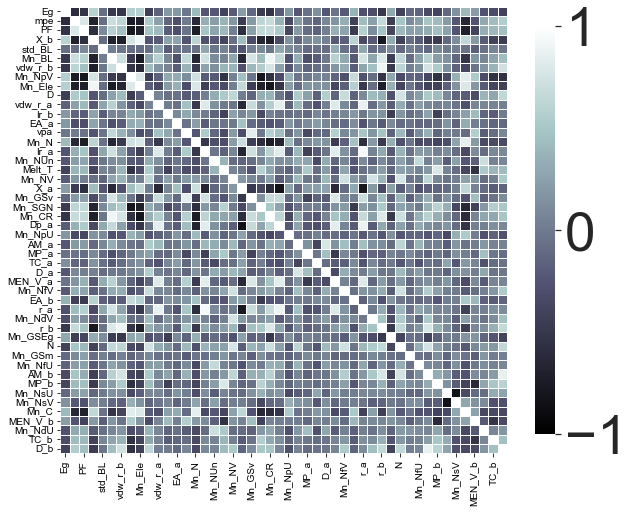

In [22]:
df.to_csv('regression/ranking_sp3.csv', index=False)                    ## output the ranked features to a file
df = pd.read_csv('regression/ranking_sp3.csv')
df_ = df[:]

sel_feat = df_['Feature']
la = X.loc[:,sel_feat]
X_f = pd.DataFrame(la)

## ============================================================================
#      Remove highly correlated features (only after checking correlation)
## ============================================================================
#rem = ['Avg_dev Electronegativity', 'Avg_dev Number'] # highly correlated features; to be removed
#rem_no = [16, 15] ## check the correspnding row numbers from the 'ranking_elem+hard-feat.csv' file
#for col in rem:
#    if col in X_f.columns:
#        del X_f[col]
#df_.drop(rem_no, inplace=True)

## ============================================================================
#                     Correlation plot
## ============================================================================
corr = X_f.corr()
fig = plt.subplots(figsize=(10,10))
sns.set(font_scale=5)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=1, vmin=-1, fmt=".2f", linewidths=.5, square=True, center=0, \
                      annot=False, cmap='bone', annot_kws={"size": 10, "weight": 'bold'} ,cbar_kws={'shrink':0.75})
sns.color_palette('bright')                                            # choose from colorblind, bright or muted
ax.set_xticklabels(df_['Feature'], fontsize=10)
ax.set_yticklabels(df_['Feature'], fontsize=10)
plt.show()
#plt.savefig('images/corr_ranked-feat.png', dpi=1000)

<Figure size 1080x1080 with 0 Axes>

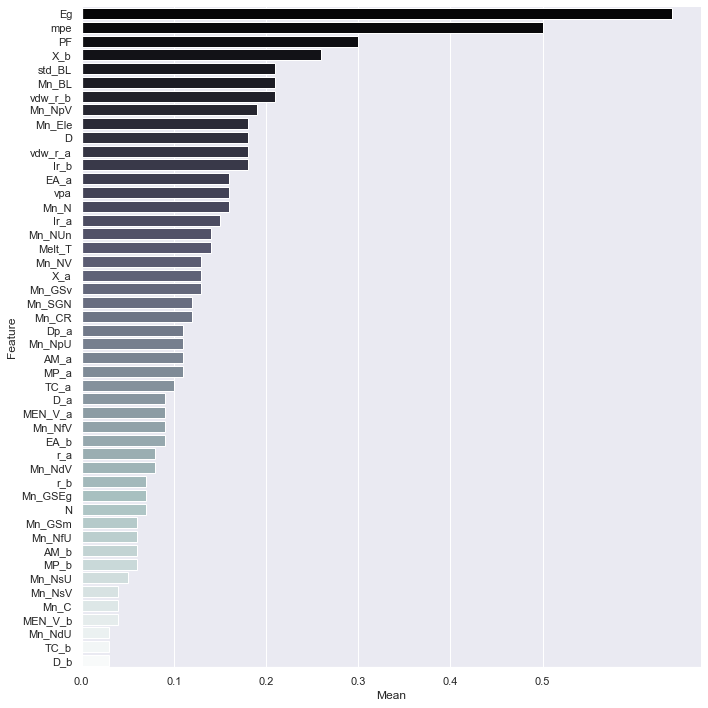

In [23]:
# =============================================================================
#                  Feature ranking plot 
# =============================================================================       
plt.figure(figsize=(15,15))
sns.set(font_scale = 1)
h = sns.catplot(x="Mean", y="Feature", data = df_, kind="bar", height=10, aspect=1, palette='bone') #flare
h.ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
sns.color_palette('coolwarm', as_cmap=True)                                          # choose from colorblind, bright or muted
plt.show()
#plt.savefig('images/feat-score_ranked2.png', dpi=1000)

<Figure size 360x360 with 0 Axes>

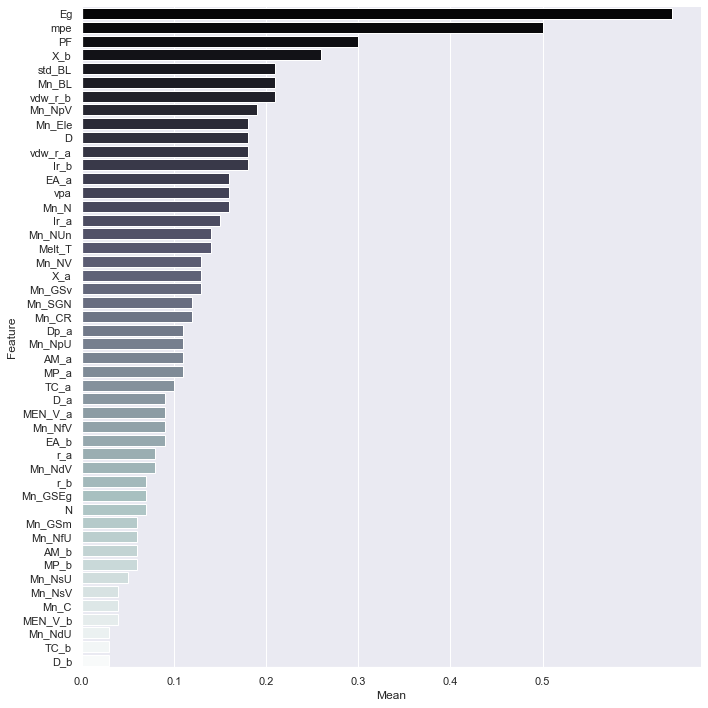

In [25]:
# =============================================================================
#                  Feature ranking plot 
# =============================================================================       
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set(font_scale = 1)
h = sns.catplot(x="Mean", y="Feature", data = df_, kind="bar", height=10, aspect=1, palette='bone') #flare
h.ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
sns.color_palette('coolwarm', as_cmap=True)                                          # choose from colorblind, bright or muted
plt.show()
#plt.savefig('images/feat-score_ranked3.png', dpi=1000)

In [ ]:
# =============================================================================
#        Exporting the final dataset (to be utilized in rest of ML studies)
# =============================================================================

df_final = pd.concat([data['formula'],Y, X_f], axis=1)
df_final.to_csv('regression/final_elem_SP.csv', index=False)

In [ ]:
import pandas as pd
#data = pd.read_csv('datasets/final_elem+voltage-feat_data.csv')
data = pd.read_csv('dataset/final_elem+voltage-feat_data3.csv')
data.head()

In [ ]:
columns_names = list(data.columns)
columns_names.remove('formula')
columns_names.remove('p-Seebeck')
numerical_features = columns_names
numerical_features

In [ ]:
from pycaret.regression import *
clf = setup(data = data, target = 'p-Seebeck', train_size=0.9, numeric_features = numerical_features)

In [ ]:
models = ['xgboost', 'catboost', 'lr', 'lasso', 'ridge', 'en','kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada', 'gbr', 'mlp', 'lightgbm']
best = compare_models(sort='R2', include=models)

In [ ]:
print(best)

In [ ]:
lgbm = create_model('lightgbm')

In [ ]:
tuned_lgbm = tune_model(lgbm)

In [ ]:
print(tuned_lgbm)

In [ ]:
plot_model(tuned_lgbm)

In [ ]:
predict_model(tuned_lgbm)

In [ ]:
dd = predict_model(tuned_lgbm)
dd.to_csv("dataset/tuned_lgbm_prediction.csv")

In [ ]:
##saving the model for as pickle 
#You can laod and use the model using
#from pycaret.regression import load_model
#saved_tuned_lgbm_model = load_model('saved_models/saved_tuned_lgbm_model.pkl)
save_model(tuned_lgbm, "saved_models/saved_tuned_lgbm_model")

In [ ]:
plot_model(tuned_lgbm, plot = "parameter")

In [ ]:
plot_model(tuned_lgbm, plot = 'error')

In [ ]:
plot_model(tuned_lgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lgbm)

In [ ]:
catboost = create_model('catboost')
tuned_catboost = tune_model(catboost)
plot_model(tuned_catboost, plot = 'error')

In [ ]:
save_model(tuned_catboost, "saved_models/saved_catboost_model")

In [ ]:
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost)
plot_model(tuned_xgboost, plot = 'error')

In [ ]:
save_model(tuned_xgboost, "saved_models/saved_tuned_xgboost_model")

In [ ]:
et = create_model('et')
tuned_et = tune_model(et)
plot_model(tuned_et, plot = 'error')

In [ ]:
save_model(tuned_et, "saved_models/saved_tuned_et_model")

In [ ]:
rf = create_model('rf')
tuned_rf = tune_model(rf)
plot_model(tuned_rf, plot = 'error')

In [ ]:
save_model(tuned_rf, "saved_models/saved_tuned_rf_model")

In [ ]:
gbr = create_model('gbr')
tuned_gbr = tune_model(gbr)
plot_model(tuned_gbr, plot = 'error')

In [ ]:
save_model(tuned_gbr, "saved_models/saved_tuned_gbr_model")

In [ ]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge)
plot_model(tuned_ridge, plot = 'error')

In [ ]:
save_model(tuned_ridge, "saved_models/saved_tuned_ridge_model")

In [ ]:
svm = create_model('svm')
tuned_svm = tune_model(svm)
plot_model(tuned_svm, plot = 'error')

In [ ]:
save_model(tuned_svm, "saved_models/saved_tuned_svm_model")

In [ ]:
kr = create_model('kr')
tuned_kr = tune_model(kr)
plot_model(tuned_kr, plot = 'error')

In [ ]:
save_model(tuned_kr, "saved_models/saved_tuned_kr_model")